<a href="https://colab.research.google.com/github/farid-hamid/FinalYearProjectFH/blob/main/NLP_Model_Framework_v11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NLP Model Framework** 🔡📊
---
*This notebook consists and demonstrates a working NLP model framework consisting of an unsupervised learning stage (extracting and labelling topics from a text corpus) and a supervised stage (multi topic text classification). The text corpus consists of posts and comments from popular Diabetes based subReddits where the discussion of Continuous Glucose Monitoring systems and devices are common.*

# **Initial Importing & pip installation of relevant libraries** 📦

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from matplotlib import pyplot as plt
import seaborn as sns
import re

In [2]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
import string

In [4]:
import nltk

In [5]:
%pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 2.7 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=55b59cae1e14be1ad02e08362f2f4c6faa346c439906ee7793ec7c86f7be895c
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


In [6]:
%pip install HDBSCAN

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 34.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
  Created wheel for HDBSCAN: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039269 sha256=1452941911f3ed862ff2f371749e84bb80b2ceed935b1fff30e313a7372e70ff
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
Successfully built HDBSCAN
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.9
    Uninstalling Cython-3.0.9:
      Successfully uninstalled Cython-3.0.9


# **Data Cleaning and Natural Language Processing** 🧼📖
*Preparing the text corpus for upcoming topic modelling by normalising the data, removing polluting elements of user-generated data and appropriating document length using spaCy.*

In [7]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Unlabelled Reddit Posts.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1345 entries, 0 to 1344
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   subReddit            1345 non-null   object        
 1   Datetime             1345 non-null   datetime64[ns]
 2   Title                1339 non-null   object        
 3   Body Text            1069 non-null   object        
 4   Top Comment          236 non-null    object        
 5   Top Comment Reply 1  112 non-null    object        
 6   Top Comment Reply 2  30 non-null     object        
 7   Top Comment Reply 3  7 non-null      object        
 8   Top Comment Reply 4  3 non-null      object        
dtypes: datetime64[ns](1), object(8)
memory usage: 94.7+ KB


In [8]:
df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1345 entries, 0 to 1344
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   subReddit            1345 non-null   object        
 1   Datetime             1345 non-null   datetime64[ns]
 2   Title                1339 non-null   object        
 3   Body Text            1069 non-null   object        
 4   Top Comment          236 non-null    object        
 5   Top Comment Reply 1  112 non-null    object        
 6   Top Comment Reply 2  30 non-null     object        
 7   Top Comment Reply 3  7 non-null      object        
 8   Top Comment Reply 4  3 non-null      object        
dtypes: datetime64[ns](1), object(8)
memory usage: 94.7+ KB


In [9]:
data = df

In [10]:
data.head()

,subReddit,Datetime,Title,Body Text,Top Comment,Top Comment Reply 1,Top Comment Reply 2,Top Comment Reply 3,Top Comment Reply 4
0,diabetes_t2,2023-12-05 23:25:00,Cheapest way to get a CGM without insurance?,Well after being told my insurance would cover...,NaN,NaN,NaN,NaN,NaN
1,diabetes_t2,2023-12-20 05:13:00,Libre 3 doesn’t stick,I’ve used the Libre 3 for 3 months off and on....,NaN,NaN,NaN,NaN,NaN
2,diabetes_t2,2023-12-23 23:16:00,Frustrated with Libre 3,I just got off the phone with customer support...,NaN,NaN,NaN,NaN,NaN
3,diabetes_t2,2023-12-23 02:32:00,Libre 3 Graphs 3 weeks in,The first graph was my first full day with my ...,NaN,NaN,NaN,NaN,NaN
4,diabetes_t2,2023-12-07 16:34:00,Confused by GMI on Libre 3,I'm finding myself confused by the GMI measure...,NaN,NaN,NaN,NaN,NaN


In [11]:
n = len(data)

In [12]:
data.drop(['Datetime'], axis=1)


,subReddit,Title,Body Text,Top Comment,Top Comment Reply 1,Top Comment Reply 2,Top Comment Reply 3,Top Comment Reply 4
0,diabetes_t2,Cheapest way to get a CGM without insurance?,Well after being told my insurance would cover...,NaN,NaN,NaN,NaN,NaN
1,diabetes_t2,Libre 3 doesn’t stick,I’ve used the Libre 3 for 3 months off and on....,NaN,NaN,NaN,NaN,NaN
2,diabetes_t2,Frustrated with Libre 3,I just got off the phone with customer support...,NaN,NaN,NaN,NaN,NaN
3,diabetes_t2,Libre 3 Graphs 3 weeks in,The first graph was my first full day with my ...,NaN,NaN,NaN,NaN,NaN
4,diabetes_t2,Confused by GMI on Libre 3,I'm finding myself confused by the GMI measure...,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
1340,Freestylelibre,Libre 2,"I have a Libre 2 and today had a low, my alarm...",The sensor sends alarms to the phone by Blueto...,I did scan it and it was low but it still didn...,Un the US Abbott announced that the Libre 2 Pl...,NaN,NaN
1341,Freestylelibre,Second bad Freestyle Libre 3 sensor in one day!,I had to call Abbott to get a replacement this...,Have they actually failed? Sometimes the readi...,The first one was fine for the first 36 hours ...,Especially the Libre3 have had severe 'burn-in...,NaN,NaN
1342,Freestylelibre,Freestyle libre 2 sensor,Hi this is my first time using it. \nI opened ...,It should work fine. since you have not attach...,What happens if i attach it? I tried attaching...,NaN,NaN,NaN
1343,Freestylelibre,Libre 3 Juggluco,So my SAMSUNG S24 wont read my Libre 3 so Jugg...,You need to activate the sensor with a compati...,NaN,NaN,NaN,NaN


In [13]:
#lowercase
data['Title'] = data['Title'].str.lower()
data['Body Text'] = data['Body Text'].str.lower()
data['Top Comment'] = data['Top Comment'].str.lower()
data['Top Comment Reply 1'] = data['Top Comment Reply 1'].str.lower()
data['Top Comment Reply 2'] = data['Top Comment Reply 2'].str.lower()
#data['Top Comment Reply 3'] = data['Top Comment Reply 3'].str.lower()
#data['Top Comment Reply 4'] = data['Top Comment Reply 4'].str.lower()

In [14]:
data.head()

,subReddit,Datetime,Title,Body Text,Top Comment,Top Comment Reply 1,Top Comment Reply 2,Top Comment Reply 3,Top Comment Reply 4
0,diabetes_t2,2023-12-05 23:25:00,cheapest way to get a cgm without insurance?,well after being told my insurance would cover...,NaN,NaN,NaN,NaN,NaN
1,diabetes_t2,2023-12-20 05:13:00,libre 3 doesn’t stick,i’ve used the libre 3 for 3 months off and on....,NaN,NaN,NaN,NaN,NaN
2,diabetes_t2,2023-12-23 23:16:00,frustrated with libre 3,i just got off the phone with customer support...,NaN,NaN,NaN,NaN,NaN
3,diabetes_t2,2023-12-23 02:32:00,libre 3 graphs 3 weeks in,the first graph was my first full day with my ...,NaN,NaN,NaN,NaN,NaN
4,diabetes_t2,2023-12-07 16:34:00,confused by gmi on libre 3,i'm finding myself confused by the gmi measure...,NaN,NaN,NaN,NaN,NaN


In [15]:
data.fillna('', inplace=True)
data['Discussion'] = data.apply(lambda row: ' '.join(row[['Title', 'Body Text', 'Top Comment']].values), axis=1)

In [16]:
data.head()

,subReddit,Datetime,Title,Body Text,Top Comment,Top Comment Reply 1,Top Comment Reply 2,Top Comment Reply 3,Top Comment Reply 4,Discussion
0,diabetes_t2,2023-12-05 23:25:00,cheapest way to get a cgm without insurance?,well after being told my insurance would cover...,,,,,,cheapest way to get a cgm without insurance? w...
1,diabetes_t2,2023-12-20 05:13:00,libre 3 doesn’t stick,i’ve used the libre 3 for 3 months off and on....,,,,,,libre 3 doesn’t stick i’ve used the libre 3 fo...
2,diabetes_t2,2023-12-23 23:16:00,frustrated with libre 3,i just got off the phone with customer support...,,,,,,frustrated with libre 3 i just got off the pho...
3,diabetes_t2,2023-12-23 02:32:00,libre 3 graphs 3 weeks in,the first graph was my first full day with my ...,,,,,,libre 3 graphs 3 weeks in the first graph was ...
4,diabetes_t2,2023-12-07 16:34:00,confused by gmi on libre 3,i'm finding myself confused by the gmi measure...,,,,,,confused by gmi on libre 3 i'm finding myself ...


In [17]:
def remove_punctuation_and_emojis(text):
    if not isinstance(text, str):
        #if text is not a string, return it as it is
        return text

    punctuation = string.punctuation
    #punctuation translator
    translator = str.maketrans('', '', string.punctuation)
    #remove punctuation
    text = text.translate(translator)

    #regex pattern for emojis
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  #emoticons
                           u"\U0001F300-\U0001F5FF"  #symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  #transport & map symbols
                           u"\U0001F700-\U0001F77F"  #alchemical symbols
                           u"\U0001F780-\U0001F7FF"  #Geometric Shapes Extended
                           u"\U0001F800-\U0001F8FF"  #Supplemental Arrows-C
                           u"\U0001F900-\U0001F9FF"  #Supplemental Symbols and Pictographs
                           u"\U0001FA00-\U0001FA6F"  #Chess Symbols
                           u"\U0001FA70-\U0001FAFF"  #Symbols and Pictographs Extended-A
                           u"\U00002702-\U000027B0"  #Dingbats
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text) #removals

    return text

In [18]:
data['Discussion'] = data['Discussion'].apply(lambda x: remove_punctuation_and_emojis(x))

In [19]:
#removal of other incoherent chars
def remove_chars(text):

    if isinstance(text, str):
        #replace numbers with empty string, remove nd,rd,st, http and www, any strings longer than 26 chars
        text = re.sub(r'\d+', '', text)
        text = re.sub(r'\bnd\b|\b[a-zA-Z]{1,2}\b', '', text)
        text = re.sub(r'\brd\b|\b[a-zA-Z]{1,2}\b', '', text)
        text = re.sub(r'\bst\b|\b[a-zA-Z]{1,2}\b', '', text)
        text = re.sub(r'\bblah\b|\b[a-zA-Z]{1,2,3,4}\b', '', text)
        text = re.sub(r'https?://\S+|www\.\S+', '', text)
        text = re.sub(r'\b\w{26,}\b', '', text)
    return text


In [20]:
data['Discussion'] = data['Discussion'].apply(lambda x: remove_chars(x) if isinstance(x, str) else x)

In [21]:
data = data[data['Discussion'].apply(lambda x: len(x) >= 10)] #remove records which are too short and will pollute the model

In [22]:
def clean_text_digits(text):
    #Tokenize the text into words
    tokens = word_tokenize(text)


    translator = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(translator) for w in tokens]

    #Remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()and len(word) > 2]

    #join the list of words into a single string
    return ' '.join(words)

In [23]:
data['Discussion'] = data['Discussion'].apply(clean_text_digits)
df.head()

<ipython-input-23-f76292ae7eca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Discussion'] = data['Discussion'].apply(clean_text_digits)


,subReddit,Datetime,Title,Body Text,Top Comment,Top Comment Reply 1,Top Comment Reply 2,Top Comment Reply 3,Top Comment Reply 4,Discussion
0,diabetes_t2,2023-12-05 23:25:00,cheapest way to get a cgm without insurance?,well after being told my insurance would cover...,,,,,,cheapest way get cgm without insurance well ...
1,diabetes_t2,2023-12-20 05:13:00,libre 3 doesn’t stick,i’ve used the libre 3 for 3 months off and on....,,,,,,libre doesn’ stick ’ used the libre for mon...
2,diabetes_t2,2023-12-23 23:16:00,frustrated with libre 3,i just got off the phone with customer support...,,,,,,frustrated with libre just got off the phone...
3,diabetes_t2,2023-12-23 02:32:00,libre 3 graphs 3 weeks in,the first graph was my first full day with my ...,,,,,,libre graphs weeks the first graph was fir...
4,diabetes_t2,2023-12-07 16:34:00,confused by gmi on libre 3,i'm finding myself confused by the gmi measure...,,,,,,confused gmi libre finding myself confused...


In [24]:
#lemmatization
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer


In [25]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [26]:
#part of speech tagging function
# def get_wordnet_pos(word):
#     tag = nltk.pos_tag([word])[0][1][0].upper()
#     tag_dictionary = {"J": wordnet.ADJ,
#                 "N": wordnet.NOUN,
#                 "V": wordnet.VERB,
#                 "R": wordnet.ADV}

#     return tag_dictionary.get(tag, wordnet.NOUN)

In [27]:
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    #tokenize text to words
    words = word_tokenize(text)
    #lemmatize each word with pos tags
    return ' '.join([lemmatizer.lemmatize(w) for w in words])

In [28]:
data['Discussion'] = data['Discussion'].apply(lambda x: lemmatize_text(x) if isinstance(x, str) else x)

<ipython-input-28-dc29a49472ea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Discussion'] = data['Discussion'].apply(lambda x: lemmatize_text(x) if isinstance(x, str) else x)


In [29]:
data.head()

,subReddit,Datetime,Title,Body Text,Top Comment,Top Comment Reply 1,Top Comment Reply 2,Top Comment Reply 3,Top Comment Reply 4,Discussion
0,diabetes_t2,2023-12-05 23:25:00,cheapest way to get a cgm without insurance?,well after being told my insurance would cover...,,,,,,cheapest way get cgm without insurance well af...
1,diabetes_t2,2023-12-20 05:13:00,libre 3 doesn’t stick,i’ve used the libre 3 for 3 months off and on....,,,,,,libre doesn stick used the libre for month off...
2,diabetes_t2,2023-12-23 23:16:00,frustrated with libre 3,i just got off the phone with customer support...,,,,,,frustrated with libre just got off the phone w...
3,diabetes_t2,2023-12-23 02:32:00,libre 3 graphs 3 weeks in,the first graph was my first full day with my ...,,,,,,libre graph week the first graph wa first full...
4,diabetes_t2,2023-12-07 16:34:00,confused by gmi on libre 3,i'm finding myself confused by the gmi measure...,,,,,,confused gmi libre finding myself confused the...


In [30]:
%pip install spacy

In [31]:
import spacy

#spaCy English model loading
nlp = spacy.load("en_core_web_sm")

In [32]:
def document_length_splitter(texts, character_threshold=30):

  #parse text using spaCy
  if len(texts) > character_threshold:
        # Parse the text using spaCy to extract sentences
        doc = nlp(texts)
        #Return a list of sentences
        return [sentence.text for sentence in doc.sents]
  else:
        #If the text is not too long, return it as a single-element list
        return [texts]


In [33]:
df2 = data.copy()

In [34]:
df2['Discussion'] = df2['Discussion'].apply(document_length_splitter)

In [35]:
df3 = df2.explode('Discussion')

In [36]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1584 entries, 0 to 1344
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   subReddit            1584 non-null   object        
 1   Datetime             1584 non-null   datetime64[ns]
 2   Title                1584 non-null   object        
 3   Body Text            1584 non-null   object        
 4   Top Comment          1584 non-null   object        
 5   Top Comment Reply 1  1584 non-null   object        
 6   Top Comment Reply 2  1584 non-null   object        
 7   Top Comment Reply 3  1584 non-null   object        
 8   Top Comment Reply 4  1584 non-null   object        
 9   Discussion           1584 non-null   object        
dtypes: datetime64[ns](1), object(9)
memory usage: 136.1+ KB


# **UMAP for Dimensionality Reduction & HDBSCAN for Clustering of topics**🪣
*Sub-model configuration to be fed into BERTopic model.*

In [37]:
from umap import UMAP
from hdbscan import HDBSCAN

umap_model = UMAP(n_neighbors=3, n_components=3, min_dist=0.02, random_state=42)
hdbscan_model = HDBSCAN(min_cluster_size=30, min_samples=10,
                        prediction_data=True, gen_min_span_tree=True)

In [38]:
%pip install bertopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.5/156.5 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 47.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 48.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

In [39]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.util import ngrams

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [40]:
from tqdm.auto import tqdm

In [41]:
n = len(df3)

In [42]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer


# **Stopwords Removal and Initiation of Vectorizer sub model**📑
A list of words which are extremely common in the use case and pollutants to the unsupervised learning algorithm pipeline being implemented. These are injected into the vectorizer sub model.



In [43]:
# from nltk.corpus import stopwords
# stopwords = list(stopwords.words('english')) + ['prescription','doesn','sensor','sensors','yes','lol','ha','wa','lmao','wtf','abbott','abott','pay','month','medicare', 'cgms', 'fda', 'patients', 'voucher', 'doctor', 'dex', 'authorization', 'cost', 'service','medical','covered','freestyle','company','tempo','glucose','cover','mgdl','reading','lot','wanting','want','hours','months','readings','question','since','day','night','first','last','started','ago','dont','using','use','pump','loss','around','new','phone','put','days','app', 'mmol','mmoll', 'drug','heck','the','http', 'https', 'amp', 'com', 'one', 'www', 'anyone', 'can', 'CVS', 'insurance', 'get', 'like', 'back', 'ive', 'would', 'omnipod', 'pharmacy', 'medtronic', 'to', 'turn','up','out','price', 'cgm','sugar','finger','prick','time','really','else','anybody','wait','blood','also','insulin','know','still','feel','got','thank','thanks','think','numbers','stick','going','check','about','even','too','always','much','be','how','yeah','pocket','yeah yeah','for','months']
# vectorizer_model = CountVectorizer(ngram_range=(1, 3), stop_words=stopwords)

In [44]:
from nltk.corpus import stopwords
stopwords = list(stopwords.words('english')) + ['thank','yeah','sensor','insurance','prescription','help','yes','no','yet',
                                                'still','wa','great','good','job','good job','one day', 'authorization', 'cost',
                                                'service','medical','covered','freestyle','company','tempo','glucose','cover',
                                                'mgdl','reading','lot','wanting','want','hours','months','readings','question',
                                                'since','day','night','first','last','started','ago','dont','using','use','pump',
                                                'loss','around','new','phone','put','days','app', 'mmol','mmoll', 'drug','heck',
                                                'the','http', 'https', 'amp', 'com', 'one', 'www', 'anyone', 'can', 'CVS', 'insurance',
                                                'get', 'like', 'back', 'ive', 'would', 'omnipod', 'pharmacy', 'medtronic', 'to',
                                                'turn','up','out','price', 'cgm','sugar','finger','prick','time','really','else',
                                                'anybody','wait','blood','also','insulin','know','still','feel','got','thank',
                                                'thanks','think','numbers','stick','going','check','about','even','too','always',
                                                'much','be','how','yeah','pocket','yeah yeah','for','months','invite','follower','anonymous','anonymously']
vectorizer_model = CountVectorizer(ngram_range=(1, 3), stop_words=stopwords)

# **Embedding Text with Sentence Transformers**🤖
*Leveraging sentence transformers, documents in the text corpus are embedded in small batches for quality. These embeddings are saved in the* embeds *variable for later on, when the topic labels are extracted and they can be combined with the embedded dataset.*

In [45]:
embedding_model = SentenceTransformer('all-MiniLM-L6-v2')
embeds = np.zeros((n, embedding_model.get_sentence_embedding_dimension()))
texts = df3['Discussion'].tolist()


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [46]:
#texts

In [47]:
batch_size=15

In [48]:
 for i in tqdm(range(0,n,batch_size)):
     i_end = min(i+batch_size,n)
     batch = df3['Discussion'].iloc[i:i_end].tolist()
     batch_embed = embedding_model.encode(batch)
     embeds[i:i_end,:] = batch_embed

  0%|          | 0/106 [00:00<?, ?it/s]

# **Representation sub-models**🌍
*Using keyBERT and Maximal Marginal Relevance to generate coherent topic labels which describe the pain point narrative in a piece of dialogue.*

In [49]:
from bertopic.representation import KeyBERTInspired, MaximalMarginalRelevance, TextGeneration
from transformers import pipeline

In [50]:
keybert = KeyBERTInspired()
mmr = MaximalMarginalRelevance(diversity=0.3)

representation_model = {
    "KeyBERT": keybert,
    "MMR": mmr,

}

# **BERTopic Model**💻
---
*The BERTopic model, consisting of a pipeline of unsupervised machine learning algorithms through its UMAP (dimensionality reduction), HDBSCAN (clustering with noise), text embedding, vectorisation and represenation sub-models, is initiated and trained below.*


In [51]:
BERTopic_model = BERTopic(
    #sub-models:
    umap_model=umap_model,
    hdbscan_model=hdbscan_model,
    embedding_model=embedding_model,
    vectorizer_model=vectorizer_model,
    representation_model=representation_model,
    #hyper-parameters:
    min_topic_size = 40,#careful with tuning this parameter
    top_n_words=10,
    #nr_topics= 8,
    language='english',
    calculate_probabilities=True,
    verbose=True

)
#Train model:
topics, probs = BERTopic_model.fit_transform(texts, embeddings=embeds)

2024-03-18 18:13:36,319 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-03-18 18:13:52,004 - BERTopic - Dimensionality - Completed ✓
2024-03-18 18:13:52,007 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-03-18 18:13:52,265 - BERTopic - Cluster - Completed ✓
2024-03-18 18:13:52,276 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-03-18 18:14:09,612 - BERTopic - Representation - Completed ✓


In [52]:
for i in range(10):
    print(f"{topics[i]}: {df3['Discussion'][i]}")

5: cheapest way get cgm without insurance well after being told insurance would cover freestyle libre just received letter the mail telling that dont qualify for any cgm because dont take insulin really like figure out actual high and low instead random guessing about timing and get better idea exactly how each food hitting and what dawn phenomenon look like through the night look like freestyle libre about which mean month cant afford that know you can get your first one for free through their website but doe anyone know any other way reduce the cost even can only temporarily maybe can get few month worth data the michigan
-1: libre doesn stick used the libre for month off and wish had more consistently but never had unit stay more than day been frustrating they never come off because any force accident they just become loose pregnant now and would like able wear cgm for the duration pregnancy what give please send any advice
-1: frustrated with libre just got off the phone with custo

In [53]:
BERTopic_model.visualize_barchart()

In [54]:
BERTopic_model.visualize_hierarchy()

In [55]:
#run this cell if rows are removed in NLP text cleaning, the index needs to be reset for visualize_documents() function to work
df3.reset_index(drop=True, inplace=True)

In [56]:
BERTopic_model.visualize_documents(df3['Discussion'], embeddings=embeds)

<Axes: ylabel='$\\lambda$ value'>

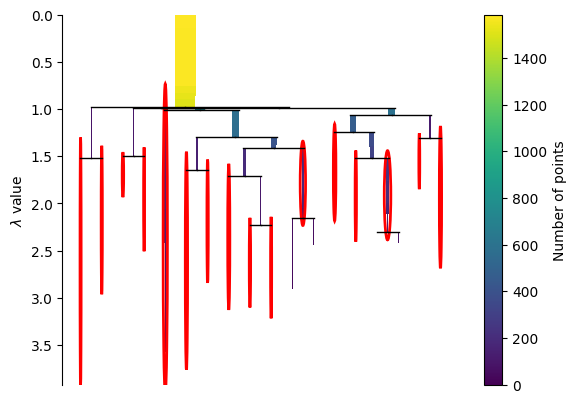

In [57]:
hdbscan_model.condensed_tree_.plot(select_clusters=True)

In [58]:
import plotly.express as px

In [59]:
assert len(topics) == len(df3)

In [60]:
df3['Topic'] = topics

In [61]:
df3.head()

,subReddit,Datetime,Title,Body Text,Top Comment,Top Comment Reply 1,Top Comment Reply 2,Top Comment Reply 3,Top Comment Reply 4,Discussion,Topic
0,diabetes_t2,2023-12-05 23:25:00,cheapest way to get a cgm without insurance?,well after being told my insurance would cover...,,,,,,cheapest way get cgm without insurance well af...,5
1,diabetes_t2,2023-12-20 05:13:00,libre 3 doesn’t stick,i’ve used the libre 3 for 3 months off and on....,,,,,,libre doesn stick used the libre for month off...,-1
2,diabetes_t2,2023-12-23 23:16:00,frustrated with libre 3,i just got off the phone with customer support...,,,,,,frustrated with libre just got off the phone w...,-1
3,diabetes_t2,2023-12-23 02:32:00,libre 3 graphs 3 weeks in,the first graph was my first full day with my ...,,,,,,libre graph week the first graph wa first full...,1
4,diabetes_t2,2023-12-07 16:34:00,confused by gmi on libre 3,i'm finding myself confused by the gmi measure...,,,,,,confused gmi libre finding myself confused the...,-1


***As seen below, we have imbalanced topic classes, which is expected from such a diverse text corpus scraped from social media. This will be accounted for in the supervised learning stage of classification.***

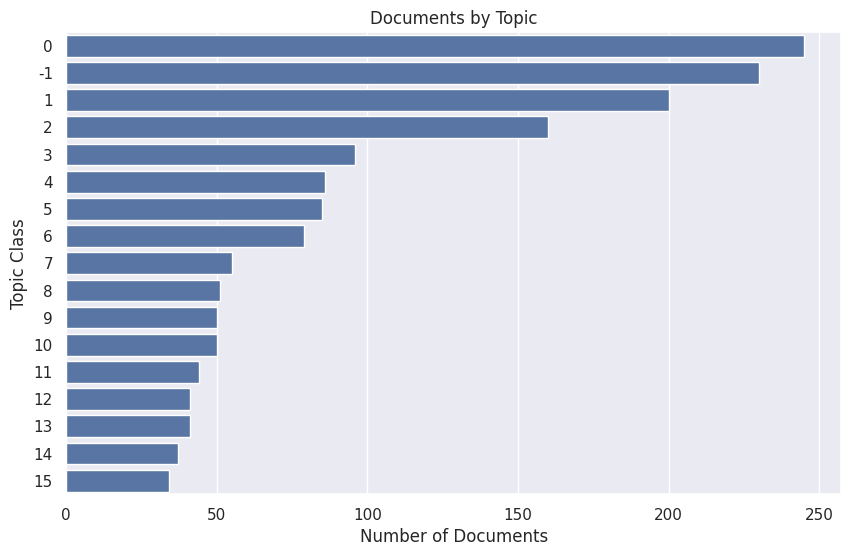

In [62]:
topic_counts = df3['Topic'].value_counts()
#data.drop(['Contains_Keywords'], axis=1)

sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.countplot(y='Topic', data=df3, order = topic_counts.index)


plt.title('Documents by Topic')
plt.xlabel('Number of Documents')
plt.ylabel('Topic Class')


plt.show()

In [63]:
topic_distr, _ = BERTopic_model.approximate_distribution(texts)

100%|██████████| 2/2 [00:02<00:00,  1.11s/it]


In [64]:
BERTopic_model.visualize_distribution(topic_distr[1])

In [65]:
probs

array([[3.65554636e-002, 5.81588381e-002, 2.55450954e-002, ...,
        3.90149925e-002, 3.75821907e-002, 8.51268421e-002],
       [1.96935989e-002, 6.33619274e-002, 1.87217269e-002, ...,
        2.03461882e-002, 1.16700196e-002, 9.32799350e-003],
       [2.12514315e-002, 6.57568102e-002, 2.00190706e-002, ...,
        2.14886806e-002, 1.21617347e-002, 9.82895633e-003],
       ...,
       [2.33977985e-002, 2.62419129e-002, 5.27579826e-001, ...,
        1.52297535e-002, 1.05204179e-002, 8.61162670e-003],
       [1.00000000e+000, 2.24381906e-308, 2.48596307e-308, ...,
        1.07586627e-308, 8.41924929e-309, 9.00120581e-309],
       [4.11656042e-308, 3.33943461e-308, 1.62622308e-308, ...,
        1.44052271e-308, 1.16882385e-308, 1.48315660e-308]])

In [66]:
topic_distr, topic_token_distr = BERTopic_model.approximate_distribution(texts, calculate_tokens=True)
topic_dist_df = BERTopic_model.visualize_approximate_distribution(texts[1], topic_token_distr[1])


100%|██████████| 2/2 [00:01<00:00,  1.46it/s]


In [67]:
topic_dist_df

,libre,doesn,stick,used,the,libre,for,month,off,and,wish,had,more,consistently,but,never,had,unit,stay,more,than,day,been,frustrating,they,never,come,off,because,any,force,accident,they,just,become,loose,pregnant,now,and,would,like,able,wear,cgm,for,the,duration,pregnancy,what,give,please,send,any,advice
0_libre_scan_iphone_update,0.112,0.112,0.240,0.367,0.368,0.481,0.353,0.226,0.113,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1_low_libre_alarm_hour,0.000,0.000,0.000,0.000,0.101,0.203,0.203,0.203,0.101,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
5_libre_month_country_abbott,0.000,0.000,0.000,0.000,0.163,0.326,0.491,0.491,0.328,0.165,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
10_libre_cat_abbott_failed,0.000,0.000,0.000,0.000,0.132,0.264,0.264,0.264,0.132,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [68]:
BERTopic_model.visualize_term_rank(log_scale=True)

# **BERTopic Model Output Evaluation**🧪
---



# **Coherence**
*By qualitatively comparing the representations generated by the topic model, it is evident that they are coherent and diverse, where each topic is represented by uniques phrases and terms related to specific niches in CGMs usage.*

In [69]:
coherence = BERTopic_model.get_topic_info(); coherence.head(10)

,Topic,Count,Name,Representation,KeyBERT,MMR,Representative_Docs
0,-1,230,-1_libre_dexcom_arm_ha,"[libre, dexcom, arm, ha, hour, need, low, righ...","[alarm, dexcom, libre, iphone, bluetooth, devi...","[libre, dexcom, arm, ha, hour, need, low, righ...",[never used the libre only the freedom libre l...
1,0,245,0_libre_scan_iphone_update,"[libre, scan, iphone, update, io, issue, andro...","[libreview, libre, librelink, iphone io, libre...","[libre, scan, iphone, update, io, issue, andro...",[libre bluetooth android stopped working habe ...
2,1,200,1_low_libre_alarm_hour,"[low, libre, alarm, hour, minute, low alarm, l...","[low alarm, alarm, diabetes, diabetic, libre, ...","[low, libre, alarm, hour, minute, low alarm, l...",[libre and chemo all joined type diabetes diag...
3,2,160,2_replacement_abbott_hour_call,"[replacement, abbott, hour, call, libre, fault...","[error, send replacement, faulty, failed, prob...","[replacement, abbott, hour, call, libre, fault...",[libre question fairly new user libre keep rea...
4,3,96,3_signal_transmitter_dexcom_issue,"[signal, transmitter, dexcom, issue, android, ...","[signal alarm, iphone, lost signal, loses sign...","[signal, transmitter, dexcom, issue, android, ...",[signal loss and transmitter expiration questi...
5,4,86,4_dexcom_libre_patch_used,"[dexcom, libre, patch, used, accurate, dexcom ...","[try dexcom, dexcom libre, libre dexcom, dexco...","[dexcom, libre, patch, used, accurate, dexcom ...",[hate dexcom thanks insurance switched from th...
6,5,85,5_libre_month_country_abbott,"[libre, month, country, abbott, need, dexcom, ...","[libre plus, libres, cgms, libre libre, medica...","[libre, month, country, abbott, need, dexcom, ...",[libre libre plus bit spat with endocrinologis...
7,6,79,6_dexcom_low_calibrate_calibration,"[dexcom, low, calibrate, calibration, issue, h...","[low dexcom, call dexcom, dexcom, dexcom user,...","[dexcom, low, calibrate, calibration, issue, h...",[tylenol messed with dexcom son had fever with...
8,7,55,7_arm_thigh_stomach_side,"[arm, thigh, stomach, side, upper, area, abdom...","[approved arm, front arm, right arm, side arm,...","[arm, thigh, stomach, side, upper, area, abdom...",[did switching arm make difference for you got...
9,8,51,8_low_eat_eating_spike,"[low, eat, eating, spike, high, food, number, ...","[diabetes, diabetic, diet, start eating, hour ...","[low, eat, eating, spike, high, food, number, ...",[what doe the graph look like nondiabetic usin...


In [70]:
coherence_df = coherence

In [71]:
coherence_df

,Topic,Count,Name,Representation,KeyBERT,MMR,Representative_Docs
0,-1,230,-1_libre_dexcom_arm_ha,"[libre, dexcom, arm, ha, hour, need, low, righ...","[alarm, dexcom, libre, iphone, bluetooth, devi...","[libre, dexcom, arm, ha, hour, need, low, righ...",[never used the libre only the freedom libre l...
1,0,245,0_libre_scan_iphone_update,"[libre, scan, iphone, update, io, issue, andro...","[libreview, libre, librelink, iphone io, libre...","[libre, scan, iphone, update, io, issue, andro...",[libre bluetooth android stopped working habe ...
2,1,200,1_low_libre_alarm_hour,"[low, libre, alarm, hour, minute, low alarm, l...","[low alarm, alarm, diabetes, diabetic, libre, ...","[low, libre, alarm, hour, minute, low alarm, l...",[libre and chemo all joined type diabetes diag...
3,2,160,2_replacement_abbott_hour_call,"[replacement, abbott, hour, call, libre, fault...","[error, send replacement, faulty, failed, prob...","[replacement, abbott, hour, call, libre, fault...",[libre question fairly new user libre keep rea...
4,3,96,3_signal_transmitter_dexcom_issue,"[signal, transmitter, dexcom, issue, android, ...","[signal alarm, iphone, lost signal, loses sign...","[signal, transmitter, dexcom, issue, android, ...",[signal loss and transmitter expiration questi...
5,4,86,4_dexcom_libre_patch_used,"[dexcom, libre, patch, used, accurate, dexcom ...","[try dexcom, dexcom libre, libre dexcom, dexco...","[dexcom, libre, patch, used, accurate, dexcom ...",[hate dexcom thanks insurance switched from th...
6,5,85,5_libre_month_country_abbott,"[libre, month, country, abbott, need, dexcom, ...","[libre plus, libres, cgms, libre libre, medica...","[libre, month, country, abbott, need, dexcom, ...",[libre libre plus bit spat with endocrinologis...
7,6,79,6_dexcom_low_calibrate_calibration,"[dexcom, low, calibrate, calibration, issue, h...","[low dexcom, call dexcom, dexcom, dexcom user,...","[dexcom, low, calibrate, calibration, issue, h...",[tylenol messed with dexcom son had fever with...
8,7,55,7_arm_thigh_stomach_side,"[arm, thigh, stomach, side, upper, area, abdom...","[approved arm, front arm, right arm, side arm,...","[arm, thigh, stomach, side, upper, area, abdom...",[did switching arm make difference for you got...
9,8,51,8_low_eat_eating_spike,"[low, eat, eating, spike, high, food, number, ...","[diabetes, diabetic, diet, start eating, hour ...","[low, eat, eating, spike, high, food, number, ...",[what doe the graph look like nondiabetic usin...


In [72]:
df3.to_excel('/content/drive/MyDrive/Colab Notebooks/BERTopic Model Outputs.xlsx')

In [73]:
coherence_df.to_excel('/content/drive/MyDrive/Colab Notebooks/BERTopic Coherence.xlsx')

# **Supervised learning stage** ⚙🔨
---
*Feed the embedded labelled text corpus to multi-topic text classifiers to compare performance*

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import f1_score, recall_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

In [75]:
 classifier_dataset = list(zip(embeds,topics))

In [76]:
df3.head()
df3.tail()

,subReddit,Datetime,Title,Body Text,Top Comment,Top Comment Reply 1,Top Comment Reply 2,Top Comment Reply 3,Top Comment Reply 4,Discussion,Topic
1579,Freestylelibre,2024-03-16 00:55:00,libre 2,"i have a libre 2 and today had a low, my alarm...",the sensor sends alarms to the phone by blueto...,i did scan it and it was low but it still didn...,un the us abbott announced that the libre 2 pl...,,,libre have libre and today had low alarm went ...,-1
1580,Freestylelibre,2024-03-16 21:52:00,second bad freestyle libre 3 sensor in one day!,i had to call abbott to get a replacement this...,have they actually failed? sometimes the readi...,the first one was fine for the first 36 hours ...,especially the libre3 have had severe 'burn-in...,,,second bad freestyle libre sensor one day had ...,10
1581,Freestylelibre,2024-03-15 03:54:00,freestyle libre 2 sensor,hi this is my first time using it. \ni opened ...,it should work fine. since you have not attach...,what happens if i attach it? i tried attaching...,,,,freestyle libre sensor this first time using o...,2
1582,Freestylelibre,2024-03-15 00:54:00,libre 3 juggluco,so my samsung s24 wont read my libre 3 so jugg...,you need to activate the sensor with a compati...,,,,,libre juggluco samsung wont read libre juggluc...,0
1583,Freestylelibre,2024-03-15 09:41:00,your feedback please on the freestyle libre ap...,**how well does the freestyle libre app functi...,xdrip all the way,"yep xdrip, my too, since day1 ! 👍😁\n\nit is r...",,,,your feedback please the freestyle libre app y...,10


In [77]:
 X_train, X_test, y_train, y_test = train_test_split(
     [embed[0] for embed in classifier_dataset],  #embedded document features
     [embed[1] for embed in classifier_dataset],  #topic labels
     test_size=0.2, random_state=42
 )

In [78]:
# nb_model = MultinomialNB()
# nb_model.fit(X_train,y_train)

# predictions_nb = nb_model.predict(X_test)

# #print("Multinomial NB Accuracy Score = ",accuracy_score(predictions_nb, Test_Y)*100)

# f1 = f1_score(y_test, predictions_nb, average='weighted')  # Use 'macro' or 'micro' if needed
# recall = recall_score(y_test, predictions_nb, average='weighted')  # Use 'macro' or 'micro' if needed
# print("Multinomial NB Accuracy Score = ",accuracy_score(predictions_nb, y_test)*100)
# print(f"Multinomial NB F1 Score = {f1 * 100}")
# print(f"Multinomial NB Recall = {recall * 100}")


In [79]:
svm_model = SVC(C=1.0, kernel='linear', degree=3, gamma='auto', class_weight = 'balanced', probability=True)
svm_model.fit(X_train,y_train)

predictions_svm = svm_model.predict(X_test)
svm_f1 = f1_score(y_test, predictions_svm, average='macro')
svm_recall = recall_score(y_test, predictions_svm, average='macro')
print("Nonlinear SVM Accuracy Score = ",accuracy_score(predictions_svm, y_test)*100)
print(f"Nonlinear SVM F1 Score = {svm_f1 * 100}")
print(f"Nonlinear SVM Recall = {svm_recall * 100}")
print(classification_report(y_test, predictions_svm))

Nonlinear SVM Accuracy Score =  64.66876971608832
Nonlinear SVM F1 Score = 69.4783826503143
Nonlinear SVM Recall = 76.85358607276291
              precision    recall  f1-score   support

          -1       0.50      0.22      0.31        54
           0       0.73      0.62      0.67        48
           1       0.73      0.69      0.71        35
           2       0.68      0.88      0.77        32
           3       0.41      0.65      0.50        17
           4       0.56      0.60      0.58        25
           5       0.67      0.67      0.67        18
           6       0.80      0.63      0.71        19
           7       0.60      1.00      0.75         6
           8       0.43      1.00      0.60         6
           9       0.89      0.80      0.84        10
          10       0.50      0.88      0.64         8
          11       0.83      0.91      0.87        11
          12       0.67      1.00      0.80         2
          13       0.67      0.89      0.76         9
  

In [80]:
log_reg_model = LogisticRegression(max_iter=1000, class_weight='balanced')
log_reg_model.fit(X_train, y_train)
predictions_log_reg = log_reg_model.predict(X_test)
log_reg_f1 = f1_score(y_test, predictions_log_reg, average='macro')
log_reg_recall = recall_score(y_test, predictions_log_reg, average='macro')

print(classification_report(y_test, predictions_log_reg))

              precision    recall  f1-score   support

          -1       0.77      0.19      0.30        54
           0       0.68      0.58      0.63        48
           1       0.80      0.57      0.67        35
           2       0.63      0.75      0.69        32
           3       0.36      0.53      0.43        17
           4       0.48      0.56      0.52        25
           5       0.50      0.61      0.55        18
           6       0.69      0.58      0.63        19
           7       0.38      0.83      0.53         6
           8       0.50      0.83      0.62         6
           9       0.73      0.80      0.76        10
          10       0.39      0.88      0.54         8
          11       0.64      0.82      0.72        11
          12       0.33      0.50      0.40         2
          13       0.47      1.00      0.64         9
          14       0.78      0.78      0.78         9
          15       0.64      0.88      0.74         8

    accuracy              

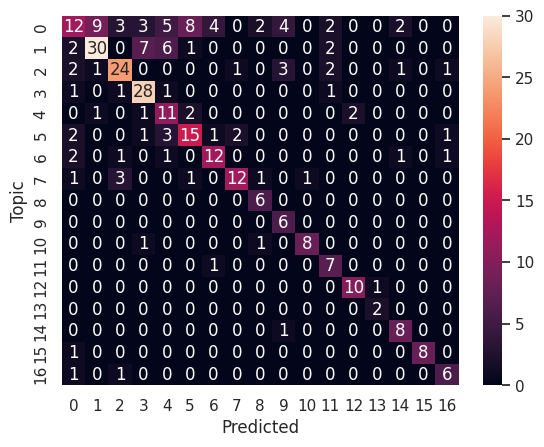

In [81]:
cm_svm = confusion_matrix(y_test, predictions_svm)
sns.heatmap(cm_svm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Topic')
plt.show()

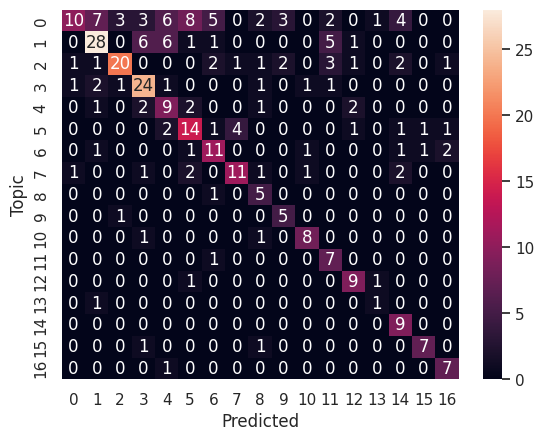

In [82]:
cm_logreg = confusion_matrix(y_test, predictions_log_reg)
sns.heatmap(cm_logreg, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Topic')
plt.show()

In [83]:
# gbm_model = GradientBoostingClassifier(random_state=42)
# gbm_model.fit(X_train, y_train)
# gbm_predictions = gbm_model.predict(X_test)
# gbm_f1 = f1_score(y_test, gbm_predictions, average='macro')
# gbm_recall = recall_score(y_test, gbm_predictions, average='macro')


# print(classification_report(y_test, gbm_predictions))

In [84]:
# cm_gbm = confusion_matrix(y_test, gbm_predictions)
# sns.heatmap(cm_gbm, annot=True, fmt='d')
# plt.xlabel('Predicted')
# plt.ylabel('Topic')
# plt.show()

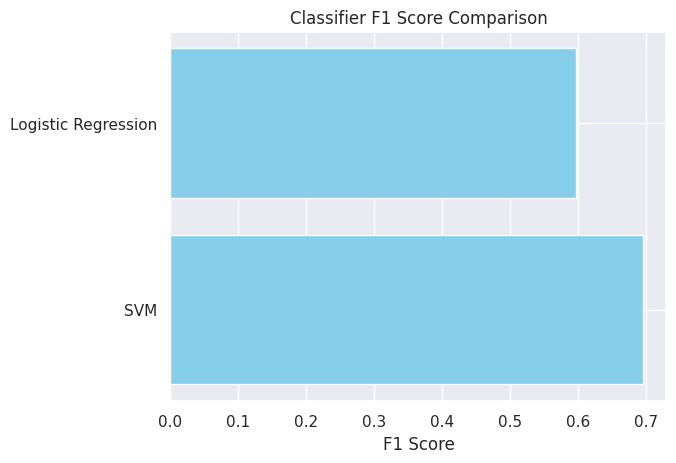

In [86]:
f1_scores = [svm_f1, log_reg_f1]
recall_scores = [svm_recall, log_reg_recall]
labels = ['SVM', 'Logistic Regression']

plt.barh(labels, f1_scores, color='skyblue')
plt.xlabel('F1 Score')
plt.title('Classifier F1 Score Comparison')
plt.show()

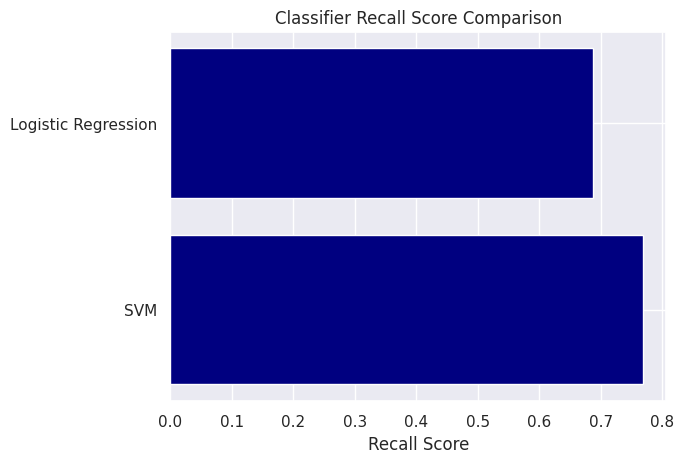

In [87]:
plt.barh(labels, recall_scores, color='navy')
plt.xlabel('Recall Score')
plt.title('Classifier Recall Score Comparison')
plt.show()